<center><h1> Libraries </h1></center>

In [1]:
import pandas as pd
from scipy.special import comb
import ecopy as ep
import plotly.graph_objects as go
%cd Desktop

/Users/mildredmonsivais/Desktop


<center><h1> Reading in Data </h1></center>

In [2]:
# OTU_table = pd.read_table('OTU_table (1).txt')
# taxonomy = pd.read_table('taxonomy.txt')
# microbiome = pd.read_table('Microbiome_mapping_14Oct2019.txt')
OTU_table1 = pd.read_table('otu_table_L6_Genus_metaboanalystlabels_byFamily.csv', sep = ",")

In [3]:
# Setting the column Sample as the index.
OTU_table1.set_index('Sample', inplace=True)

In [4]:
OTU_table1.head()

,1,2,3,4,5,6,7,8,9,10,...,88,89,90,91,92,93,94,95,96,Taxon
Sample,,,,,,,,,,,,,,,,,,,,,
Family,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,NaN
Unassigned;Other;Other;Other;Other;Other,0.098334,0.049853,0.037298,0.015194,0.032395,0.035807,0.033486,0.035065,0.04217,0.056088,...,0.025418,0.021627,0.030958,0.026389,0.019443,0.019863,0.01976,0.021464,0.022003,Unassigned;Other;Other;Other;Other;Other
k__Bacteria;Other;Other;Other;Other;Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,k__Bacteria;Other;Other;Other;Other;Other
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;Other;Other,0.000000,0.000000,0.000352,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,k__Bacteria;p__Actinobacteria;c__Actinobacteri...
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,k__Bacteria;p__Actinobacteria;c__Actinobacteri...


<center><h1> Looking for Null Values </h1></center>

In [5]:
# We are dropping Taxon because it has a null value and the same columns as Sample.
null_values = pd.DataFrame(OTU_table1.isnull().sum())
null_values.columns = ["Sums"]
null_values[null_values["Sums"] > 0]

,Sums
Taxon,1


In [6]:
# Dropping Taxon.

OTU_table1.drop(columns=['Taxon'], inplace = True, axis = 1 )

<center><h1> Subsetting Data for Heatmaps and PCA Plots </h1></center>

In [7]:
# Different dataframes for graphs

# All families
all_families = OTU_table1.copy()
all_families.drop(axis = 0, index = "Family", inplace = True)

# Family 1 
family1 = OTU_table1.copy()
family1_columns = pd.DataFrame(family1.iloc[0] == 1.0)
family1_columns = list(family1_columns[family1_columns["Family"] == True].index)
family1 = family1[family1_columns]
family1.drop(axis = 0, index = "Family", inplace = True)

# Family 2
family2 = OTU_table1.copy()
family2_columns = pd.DataFrame(family2.iloc[0] == 2.0)
family2_columns = list(family2_columns[family2_columns["Family"] == True].index)
family2 = family2[family2_columns]
family2.drop(axis = 0, index = "Family", inplace = True)

# Family 3
family3 = OTU_table1.copy()
family3_columns = pd.DataFrame(family3.iloc[0] == 3.0)
family3_columns = list(family3_columns[family3_columns["Family"] == True].index)
family3 = family3[family3_columns]
family3.drop(axis = 0, index = "Family", inplace = True)

# Family 4 
family4 = OTU_table1.copy()
family4_columns = pd.DataFrame(family4.iloc[0] == 4.0)
family4_columns = list(family4_columns[family4_columns["Family"] == True].index)
family4 = family4[family4_columns]
family4.drop(axis = 0, index = "Family", inplace = True)

In [8]:
# Individual 1-1 
individual_1_father = OTU_table1.copy()
individual_1_father_columns = ['1', '2', '3', '13', '14', '15']
individual_1_father = individual_1_father[individual_1_father_columns]
individual_1_father.drop(axis = 0, index = "Family", inplace = True)

# Individual 1-2
individual_2_mother = OTU_table1.copy()
individual_2_mother_columns = ['10','11','12','22','23','24']
individual_2_mother = individual_2_mother[individual_2_mother_columns]
individual_2_mother.drop(axis = 0, index = "Family", inplace = True)

# Individual 1-3, female 
individual_3_child1 = OTU_table1.copy()
individual_3_child1_columns = ['7','8','9','19','20','21']
individual_3_child1 = individual_3_child1[individual_3_child1_columns]
individual_3_child1.drop(axis = 0, index = "Family", inplace = True)

# Individual 1-4, youngest female 
individual_4_child2 = OTU_table1.copy()
individual_4_child2_columns = ['4','5','6','16','17','18']
individual_4_child2 = individual_4_child2[individual_4_child2_columns]
individual_4_child2.drop(axis = 0, index = "Family", inplace = True)

In [9]:
# Individual 2-1 
individual_2_1_father = OTU_table1.copy()
individual_2_1_father_columns = ['25', '26', '27', '37', '38', '39']
individual_2_1_father = individual_2_1_father[individual_2_1_father_columns]
individual_2_1_father.drop(axis = 0, index = "Family", inplace = True)

# Individual 2-2
individual_2_2_mother = OTU_table1.copy()
individual_2_2_mother_columns = ['28','29','30','40','41','42']
individual_2_2_mother = individual_2_2_mother[individual_2_2_mother_columns]
individual_2_2_mother.drop(axis = 0, index = "Family", inplace = True)

# Individual 2-3, male 
individual_2_3_child1 = OTU_table1.copy()
individual_2_3_child1_columns = ['34','35','36','46','47','48']
individual_2_3_child1 = individual_2_3_child1[individual_2_3_child1_columns]
individual_2_3_child1.drop(axis = 0, index = "Family", inplace = True)

# Individual 2-4, youngest female 
individual_2_4_child2 = OTU_table1.copy()
individual_2_4_child2_columns = ['31','32','33','43','44','45']
individual_2_4_child2 = individual_2_4_child2[individual_2_4_child2_columns]
individual_2_4_child2.drop(axis = 0, index = "Family", inplace = True)

In [10]:
# Individual 3-1 
individual_3_1_father = OTU_table1.copy()
individual_3_1_father_columns = ['52','53','54','64','65','66']
individual_3_1_father = individual_3_1_father[individual_3_1_father_columns]
individual_3_1_father.drop(axis = 0, index = "Family", inplace = True)

# Individual 3-2
individual_3_2_mother = OTU_table1.copy()
individual_3_2_mother_columns = ['49','50','51','61','62','63']
individual_3_2_mother = individual_3_2_mother[individual_3_2_mother_columns]
individual_3_2_mother.drop(axis = 0, index = "Family", inplace = True)

# Individual 2-3, male 
individual_3_3_child1 = OTU_table1.copy()
individual_3_3_child1_columns = ['55','56','57','67','68','69']
individual_3_3_child1 = individual_3_3_child1[individual_3_3_child1_columns]
individual_3_3_child1.drop(axis = 0, index = "Family", inplace = True)

# Individual 2-4, youngest female 
individual_3_4_child2 = OTU_table1.copy()
individual_3_4_child2_columns = ['58','59','60','70','71','72']
individual_3_4_child2 = individual_3_4_child2[individual_3_4_child2_columns]
individual_3_4_child2.drop(axis = 0, index = "Family", inplace = True)

In [11]:
# Individual 4-1 
individual_4_1_father = OTU_table1.copy()
individual_4_1_father_columns = ['73','74','75','85','86','87']
individual_4_1_father = individual_4_1_father[individual_4_1_father_columns]
individual_4_1_father.drop(axis = 0, index = "Family", inplace = True)

# Individual 4-2
individual_4_2_mother = OTU_table1.copy()
individual_4_2_mother_columns = ['76','77','78','88','89','90']
individual_4_2_mother = individual_4_2_mother[individual_4_2_mother_columns]
individual_4_2_mother.drop(axis = 0, index = "Family", inplace = True)

# Individual 4-3, male 
individual_4_3_child1 = OTU_table1.copy()
individual_4_3_child1_columns = ['79','80','81','91','92','93']
individual_4_3_child1 = individual_4_3_child1[individual_4_3_child1_columns]
individual_4_3_child1.drop(axis = 0, index = "Family", inplace = True)

# Individual 4-4, youngest female 
individual_4_4_child2 = OTU_table1.copy()
individual_4_4_child2_columns = ['82','83','84','94','95','96']
individual_4_4_child2 = individual_4_4_child2[individual_4_4_child2_columns]
individual_4_4_child2.drop(axis = 0, index = "Family", inplace = True)

<center><h1> Heatmaps </h1></center>

In [12]:
all_families

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
Sample,,,,,,,,,,,,,,,,,,,,,
Unassigned;Other;Other;Other;Other;Other,0.098334,0.049853,0.037298,0.015194,0.032395,0.035807,0.033486,0.035065,0.042170,0.056088,...,0.022213,0.025418,0.021627,0.030958,0.026389,0.019443,0.019863,0.019760,0.021464,0.022003
k__Bacteria;Other;Other;Other;Other;Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;Other;Other,0.000000,0.000000,0.000352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001147,0.000000,0.004087,0.000456,...,0.000000,0.000000,0.000305,0.000000,0.001287,0.000788,0.000427,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Bacteria;p__TM7;c__TM7-3;o__CW040;f__;g__,0.005445,0.002199,0.003519,0.002251,0.010176,0.005537,0.000459,0.000000,0.000000,0.009120,...,0.000415,0.009683,0.025586,0.011450,0.000000,0.016290,0.000214,0.000407,0.000429,0.002945
k__Bacteria;p__TM7;c__TM7-3;o__CW040;f__F16;g__,0.011211,0.002933,0.002463,0.001970,0.003901,0.000738,0.006193,0.005195,0.008360,0.009576,...,0.000208,0.000484,0.000914,0.000000,0.000000,0.001051,0.000641,0.000407,0.001502,0.001386
k__Bacteria;p__TM7;c__TM7-3;o__I025;f__Rs-045;g__,0.017297,0.018328,0.008797,0.000000,0.000000,0.000369,0.000000,0.000000,0.000000,0.002280,...,0.000000,0.000968,0.000305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
all_families.size

9504

In [14]:
sum((all_families == 0).astype(int).sum(axis=1))

5576

In [15]:
(5576/9504) * 100
# why is 58% of the data kept if there all zero values? 

58.670033670033675

In [16]:
# Heatmap 1
fig = go.Figure(data = go.Heatmap(
                   z = all_families.values,
                   x = all_families.columns,
                   y = all_families.index,
                   hoverongaps = False))

fig.update_layout(
    
    title={
        'text': "All Families",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig.show()
fig.write_image("Heatmaps/all_families.png")

In [17]:
# Heatmap 2
fig1 = go.Figure(data = go.Heatmap(
                   z = family1.values,
                   x = family1.columns,
                   y = family1.index,
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig1.update_layout(
    
    title={
        'text': "Family 1",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig1.show()
fig1.write_image("Heatmaps/family_1.png")

In [54]:
# Heatmap 3
fig2 = go.Figure(data = go.Heatmap(
                   z = family3.values,
                   x = family3.columns,
                   y = family3.index,
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig2.update_layout(
    
    title={
        'text': "Family 3",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")

# fig2.show()
fig2.write_image("Heatmaps/family_3.png")

In [55]:
# Heatmap 4
fig3 = go.Figure(data = go.Heatmap(
                   z = family2.values,
                   x = family2.columns,
                   y = family2.index,
                   zmin = 0, zmax = 1))

fig3.update_layout(
    
    title={
        'text': "Family 2",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig3.show()
fig3.write_image("Heatmaps/family_2.png")

In [20]:
# Heatmap 4
fig4 = go.Figure(data = go.Heatmap(
                   z = family4.values,
                   x = family4.columns,
                   y = family4.index,
                   zmin = 0, zmax = 1))


fig4.update_layout(
    
    title={
        'text': "Family 4",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")

# fig4.show()
fig4.write_image("Heatmaps/family_4.png")

In [21]:
 fig5 = go.Figure(data = go.Heatmap(
                   z = individual_1_father.values,
                   x = individual_1_father.columns,
                   y = individual_1_father.index,              
                   hoverongaps = False,
                   zmin = 0, zmax = 1))
    
fig5.update_layout(
    
    title={
        'text': "Individual 1: Father",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")    
    
    
# fig5.show()
fig5.write_image("Heatmaps/individual_1_father.png")

In [22]:
fig6 = go.Figure(data = go.Heatmap(
                   z = individual_2_mother.values,
                   x = individual_2_mother.columns,
                   y = individual_2_mother.index,              
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig6.update_layout(
    
    title={
        'text': "Individual 2: Mother",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample") 

# fig6.show()
fig6.write_image("Heatmaps/individual_2_mother.png")

In [23]:
fig7 = go.Figure(data = go.Heatmap(
                   z = individual_3_child1.values,
                   x = individual_3_child1.columns,
                   y = individual_3_child1.index,              
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig7.update_layout(
    
    title={
        'text': "Individual 3: Child 1",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample") 

# fig7.show()
fig7.write_image("Heatmaps/individual_3_child_1.png")

In [24]:
fig8 = go.Figure(data = go.Heatmap(
                   z = individual_4_child2.values,
                   x = individual_4_child2.columns,
                   y = individual_4_child2.index,              
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig8.update_layout(
    
    title={
        'text': "Individual 4: Child 2",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample") 


# fig8.show()
fig8.write_image("Heatmaps/individual_4child_2.png")

In [25]:
fig20 = go.Figure(data = go.Heatmap(
                   z = individual_2_1_father.values,
                   x = individual_2_1_father.columns,
                   y = individual_2_1_father.index,              
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig20.update_layout(
    
    title={
        'text': "Individual 2_1: Father",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")

# fig20.show()
fig20.write_image("Heatmaps/individual_2_1_father.png")

In [26]:
fig9 = go.Figure(data = go.Heatmap(
                   z = individual_2_2_mother.values,
                   x = individual_2_2_mother.columns,
                   y = individual_2_2_mother.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig9.update_layout(
    
    title={
        'text': "Individual 2_2: Mother",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig9.show()
fig9.write_image("Heatmaps/individual_2_2_mother.png")

In [27]:
fig10 = go.Figure(data = go.Heatmap(
                   z = individual_2_3_child1.values,
                   x = individual_2_3_child1.columns,
                   y = individual_2_3_child1.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig10.update_layout(
    
    title={
        'text': "Individual 2_3: Child 1",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")

# fig10.show()
fig10.write_image("Heatmaps/individual_2_3_child1.png")

In [28]:
fig11 = go.Figure(data = go.Heatmap(
                   z = individual_2_4_child2.values,
                   x = individual_2_4_child2.columns,
                   y = individual_2_4_child2.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig11.update_layout(
    
    title={
        'text': "Individual 2_4: Child 2",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig11.show()
fig11.write_image("Heatmaps/individual_2_4_child2.png")

In [29]:
fig12 = go.Figure(data = go.Heatmap(
                   z = individual_3_1_father.values,
                   x = individual_3_1_father.columns,
                   y = individual_3_1_father.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig12.update_layout(
    
    title={
        'text': "Individual 3_1: Father",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig12.show()
fig12.write_image("Heatmaps/individual_3_1father.png")

In [30]:
fig13 = go.Figure(data = go.Heatmap(
                   z = individual_3_2_mother.values,
                   x = individual_3_2_mother.columns,
                   y = individual_3_2_mother.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig13.update_layout(
    
    title={
        'text': "Individual 3_2: Mother",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig13.show()
fig13.write_image("Heatmaps/individual_3_2_mother.png")

In [31]:
fig14 = go.Figure(data = go.Heatmap(
                   z = individual_3_3_child1.values,
                   x = individual_3_3_child1.columns,
                   y = individual_3_3_child1.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig14.update_layout(
    
    title={
        'text': "Individual 3_3: Child 1",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig14.show()
fig14.write_image("Heatmaps/individual_3_3_child1.png")

In [32]:
fig15 = go.Figure(data = go.Heatmap(
                   z = individual_3_4_child2.values,
                   x = individual_3_4_child2.columns,
                   y = individual_3_4_child2.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig15.update_layout(
    
    title={
        'text': "Individual 3_4: Child 2",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")

# fig15.show()
fig15.write_image("Heatmaps/individual_3_4_child2.png")

In [33]:
fig16 = go.Figure(data = go.Heatmap(
                   z = individual_4_1_father.values,
                   x = individual_4_1_father.columns,
                   y = individual_4_1_father.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))


fig16.update_layout(
    
    title={
        'text': "Individual 4_1: Father",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig16.show()
fig16.write_image("Heatmaps/individual_4_1_father.png")

In [34]:
fig17 = go.Figure(data = go.Heatmap(
                   z = individual_4_2_mother.values,
                   x = individual_4_2_mother.columns,
                   y = individual_4_2_mother.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig17.update_layout(
    
    title={
        'text': "Individual 4_2: Mother",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig17.show()
fig17.write_image("Heatmaps/individual_4_2_mother.png")

In [35]:
fig18 = go.Figure(data = go.Heatmap(
                   z = individual_4_3_child1.values,
                   x = individual_4_3_child1.columns,
                   y = individual_4_3_child1.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig18.update_layout(
    
    title={
        'text': "Individual 4_3: Child 1",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig18.show()
fig18.write_image("Heatmaps/individual_4_3_child1.png")

In [36]:
fig19 = go.Figure(data = go.Heatmap(
                   z = individual_4_4_child2.values,
                   x = individual_4_4_child2.columns,
                   y = individual_4_4_child2.index,                           
                   hoverongaps = False,
                   zmin = 0, zmax = 1))

fig19.update_layout(
    
    title={
        'text': "Individual 4_4: Child 2",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Times New Roman",
        size=8
    ),
    
    xaxis_title="Sample")


# fig19.show()
fig19.write_image("Heatmaps/individual_4_4_child2.png")

<center><h1> PCA Plots </h1></center>

In [37]:
# Would it make sense to do PCA on individuals?

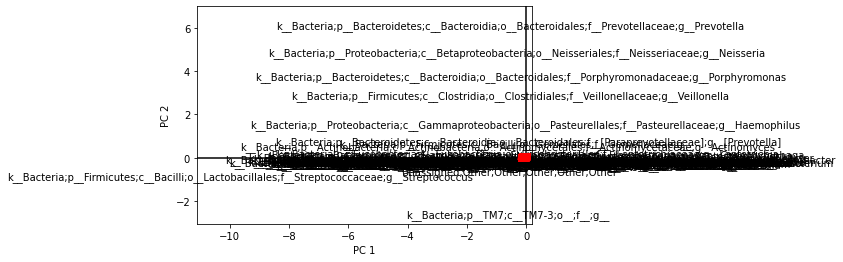

In [38]:
# All Families PCA
all_families_PCA = ep.pca(all_families, scale=False)
all_families_PCA.biplot(type='correlation', obsNames = True)

In [39]:
# Took the index below because it was so far from the graphs therefore it is an important index.
# We can see this because the values are not 0 like in the other rows, these values are 
# relatively high.
all_families.loc["k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__"]

1     0.021140
2     0.003666
3     0.006685
4     0.027012
5     0.121438
        ...   
92    0.005518
93    0.004912
94    0.002444
95    0.006439
96    0.005544
Name: k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__, Length: 96, dtype: float64

In [40]:
# This is why PC1 and PC2 were chos. Due to Highest Prop Var: 
# PC1 = 0.915056 and PC2 = 0.034348.
all_families_PCA.summary_imp()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96
Std Dev,0.538161,0.104265,0.072423,0.053799,0.044293,0.041097,0.035201,0.032360,0.025827,0.024109,...,7.004236e-06,6.039053e-06,5.102186e-06,4.848261e-06,3.735384e-06,2.669771e-06,1.895073e-06,1.421497e-06,7.300257e-07,3.449808e-07
Prop Var,0.915056,0.034348,0.016572,0.009145,0.006199,0.005336,0.003915,0.003309,0.002107,0.001837,...,1.550045e-10,1.152287e-10,8.224990e-11,7.426683e-11,4.408526e-11,2.252013e-11,1.134683e-11,6.384320e-12,1.683833e-12,3.760216e-13
Cum Var,0.915056,0.949404,0.965976,0.975121,0.981319,0.986656,0.990571,0.993879,0.995987,0.997823,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


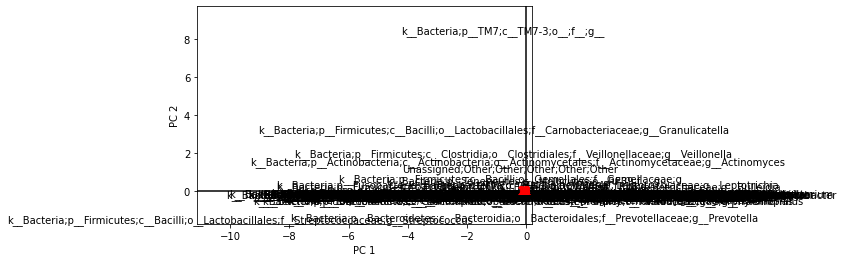

In [41]:
# Family 1 PCA
family1PCA = ep.pca(family1, scale=False)
family1PCA.biplot(type='correlation', obsNames = True)

In [42]:
# Family 1 important index as a result of PCA.
family1.loc["k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__"]

1     0.021140
2     0.003666
3     0.006685
4     0.027012
5     0.121438
6     0.152086
7     0.103211
8     0.035065
9     0.078766
10    0.130871
11    0.018275
12    0.036308
13    0.014641
14    0.044534
15    0.037060
16    0.005420
17    0.029531
18    0.035120
19    0.132821
20    0.079788
21    0.013019
22    0.250837
23    0.113833
24    0.028497
Name: k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__, dtype: float64

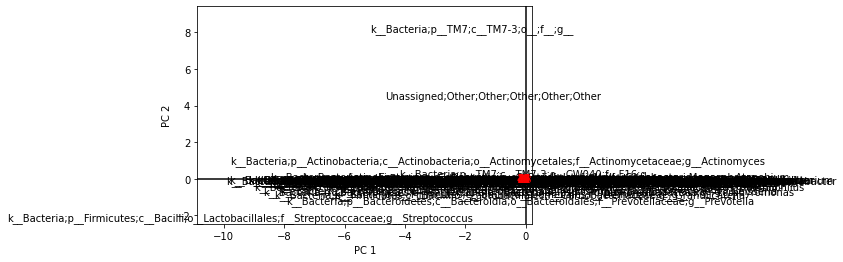

In [43]:
# Family 2 PCA
family2PCA = ep.pca(family2, scale=False)
family2PCA.biplot(type='correlation', obsNames = True)

In [44]:
# Family 2 important index as a result of PCA.
family2.loc["k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__"]

25    0.029447
26    0.171762
27    0.319322
28    0.070745
29    0.031111
30    0.018209
31    0.131494
32    0.006763
33    0.000720
34    0.139501
35    0.217760
36    0.181761
37    0.107570
38    0.102912
39    0.284953
40    0.041212
41    0.040776
42    0.038903
43    0.149857
44    0.078445
45    0.041775
46    0.156211
47    0.120862
48    0.122458
Name: k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__, dtype: float64

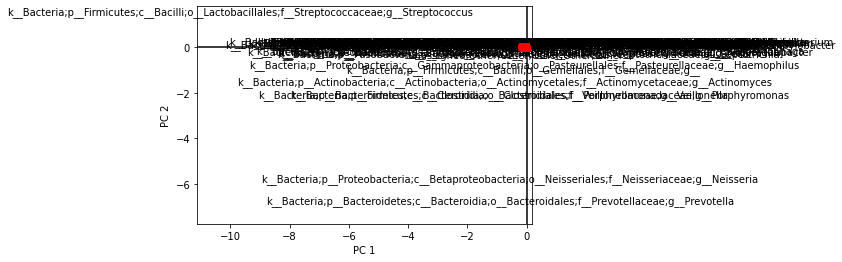

In [45]:
# Family 3 PCA
family3PCA = ep.pca(family3, scale=False)
family3PCA.biplot(type='correlation', obsNames = True)

In [46]:
# Family 3 important index as a result of PCA.
family3.loc["k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"]

49    0.762599
50    0.618000
51    0.478278
52    0.825850
53    0.294539
54    0.700516
55    0.804969
56    0.461427
57    0.595999
58    0.431430
59    0.123413
60    0.178490
61    0.718577
62    0.371717
63    0.466372
64    0.341014
65    0.640321
66    0.483997
67    1.000000
68    0.752087
69    0.733849
70    0.522906
71    0.290229
72    0.186661
Name: k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus, dtype: float64

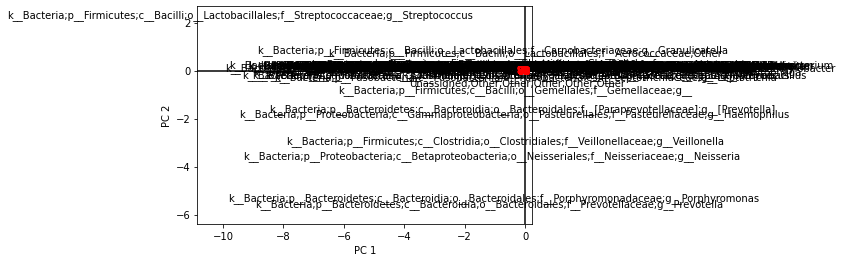

In [47]:
# Family 4 PCA
family4PCA = ep.pca(family4, scale=False)
family4PCA.biplot(type='correlation', obsNames = True)

In [48]:
# Family 4 important index as a result of PCA.
family4.loc["k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"]

73    0.700487
74    0.539798
75    0.534124
76    0.383508
77    0.239611
78    0.136040
79    0.186314
80    0.297518
81    0.329499
82    0.279417
83    0.416113
84    0.290115
85    0.639770
86    0.581665
87    0.651028
88    0.405229
89    0.372525
90    0.349873
91    0.341129
92    0.404624
93    0.532678
94    0.597067
95    0.575445
96    0.635482
Name: k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus, dtype: float64

In [58]:
import plotly.graph_objects as go

fig = go.Figure()

# Family 1
fig.add_trace(go.Scatter(x = family1.loc["k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__"].index, 
                         y = family1.loc["k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__"],
                         mode = 'lines+markers',
                         name = 'Family 1'))

# Family 2
fig.add_trace(go.Scatter(x = family2.loc["k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__"].index, 
                         y = family2.loc["k__Bacteria;p__TM7;c__TM7-3;o__;f__;g__"],
                         mode = 'lines+markers',
                         name = 'Family 2'))

# Family 3
fig.add_trace(go.Scatter(x = family3.loc["k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"].index, 
                         y = family3.loc["k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"],
                         mode='lines+markers',
                         name='Family 3'))

# Family 4
fig.add_trace(go.Scatter(x=family4.loc["k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"].index, 
                         y=family4.loc["k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"],
                         mode='lines+markers',
                         name='Family 4'))

fig.update_layout(
    title={
        'text': "Most Important Indexes per Family",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},


    xaxis_title="Sample",
    yaxis_title="Value")


fig.show()

fig.write_image("PCA Plots/Important Indexes.png")

<center><h1> Shannon H </h1></center>

In [50]:
shannonH = ep.diversity(all_families.T, 'shannon')
shannonH

D_alpha, D_beta, D_gamma = ep.div_partition(all_families.T, 'shannon')

In [51]:
D_alpha
# 5.9456922..microbial species richness between the whole sample. 

5.945649222183524

In [52]:
D_beta
# 1.387718.... microbial species differ from the 96 samples collected. 

1.3877187447376873

In [53]:
D_gamma

8.250888875259127